📖 참고, 데이터 : Do it! 데이터 분석을 위한 판다스 입문

# 판다스(pandas)

- 데이터프레임과 시리즈라는 자료형과 데이터 분석을 위한 다양한 기능을 제공하는 파이썬 라이브러리

-------

# 0. 판다스 설치

In [1]:
pip install pandas

You should consider upgrading via the 'C:\Users\ahyeon\anaconda3\python.exe -m pip install --upgrade pip' command.


# 1. 라이브러리 Import

In [2]:
import pandas as pd

# 2. 데이터 불러오기

- 데이터 : 갭마인더(열이 tab으로 구분)
- read_csv() : 쉼표로 열이 구분되어 있는 데이터

In [6]:
df = pd.read_csv('data/gapminder.tsv', sep='\t')

# 3. 시리즈와 데이터프레임

- 시리즈(Series) : 열 1개
- 데이터프레임(DataFrame) : 파이썬으로 비유하면 딕셔너리라고 생각하면 됨 // {key:value}

In [7]:
df.head()

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
2,Afghanistan,Asia,1962,31.997,10267083,853.100710
3,Afghanistan,Asia,1967,34.020,11537966,836.197138
4,Afghanistan,Asia,1972,36.088,13079460,739.981106


In [8]:
df.tail()

,country,continent,year,lifeExp,pop,gdpPercap
1699,Zimbabwe,Africa,1987,62.351,9216418,706.157306
1700,Zimbabwe,Africa,1992,60.377,10704340,693.420786
1701,Zimbabwe,Africa,1997,46.809,11404948,792.449960
1702,Zimbabwe,Africa,2002,39.989,11926563,672.038623
1703,Zimbabwe,Africa,2007,43.487,12311143,469.709298


In [9]:
print(type(df)) # 타입 확인

<class 'pandas.core.frame.DataFrame'>


In [10]:
print(df.shape) # 행, 열의 크기
print(df.shape[0]) # 행 크기
print(df.shape[1]) # 열 크기

(1704, 6)
1704
6


In [11]:
print(df.columns) # 열 이름

Index(['country', 'continent', 'year', 'lifeExp', 'pop', 'gdpPercap'], dtype='object')


In [12]:
# 값의 자료형
print(df.dtypes)
print(df.info()) # 보통 이걸 많이 씀

country       object
continent     object
year           int64
lifeExp      float64
pop            int64
gdpPercap    float64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1704 entries, 0 to 1703
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   country    1704 non-null   object 
 1   continent  1704 non-null   object 
 2   year       1704 non-null   int64  
 3   lifeExp    1704 non-null   float64
 4   pop        1704 non-null   int64  
 5   gdpPercap  1704 non-null   float64
dtypes: float64(2), int64(2), object(2)
memory usage: 80.0+ KB
None


# 4. 데이터 추출

## 열 단위로 추출

In [13]:
country_df = df['country']

print(type(country_df))

<class 'pandas.core.series.Series'>


In [16]:
subset = df[['country', 'continent', 'year']]
print(type(subset))

print(subset.head())

<class 'pandas.core.frame.DataFrame'>
       country continent  year
0  Afghanistan      Asia  1952
1  Afghanistan      Asia  1957
2  Afghanistan      Asia  1962
3  Afghanistan      Asia  1967
4  Afghanistan      Asia  1972


## 행 단위로 추출

- iloc : 행 번호(데이터의 순서)를 기준으로 행 데이터 추출, 번호를 확실히 알아야 함
- loc : 인덱스(왼쪽의 번호 또는 문자열)를 기준으로 행 데이터 추출

In [17]:
df.loc[0] # 인덱스가 0인 행 데이터 추출

country      Afghanistan
continent           Asia
year                1952
lifeExp           28.801
pop              8425333
gdpPercap        779.445
Name: 0, dtype: object

In [18]:
df.loc[[0,100,1000]] 

,country,continent,year,lifeExp,pop,gdpPercap
0,Afghanistan,Asia,1952,28.801,8425333,779.445314
100,Bangladesh,Asia,1972,45.252,70759295,630.233627
1000,Mongolia,Asia,1972,53.754,1320500,1421.741975


In [19]:
print(df.iloc[1])

country      Afghanistan
continent           Asia
year                1957
lifeExp           30.332
pop              9240934
gdpPercap        820.853
Name: 1, dtype: object


In [20]:
df.iloc[[1,11,111]]

,country,continent,year,lifeExp,pop,gdpPercap
1,Afghanistan,Asia,1957,30.332,9240934,820.853030
11,Afghanistan,Asia,2007,43.828,31889923,974.580338
111,Belgium,Europe,1967,70.940,9556500,13149.041190


In [16]:
print(df.iloc[-1]) # 끝 번호를 -1로 but, iloc만 가능 loc은 불가

country      Zimbabwe
continent      Africa
year             2007
lifeExp        43.487
pop          12311143
gdpPercap     469.709
Name: 1703, dtype: object


In [17]:
# print(df.loc[-1]) 오류 나옴

## 행, 열 추출하기

In [21]:
subset = df.loc[:5,['year', 'pop']] # loc는 행일때는 인덱스, 열일때는 열 이름이 와야함
print(subset.head())

   year       pop
0  1952   8425333
1  1957   9240934
2  1962  10267083
3  1967  11537966
4  1972  13079460


In [22]:
subset = df.iloc[:, [2, 4, -1]] # iloc는 꼭 번호가 와야함
print(subset.head()) 

   year       pop   gdpPercap
0  1952   8425333  779.445314
1  1957   9240934  820.853030
2  1962  10267083  853.100710
3  1967  11537966  836.197138
4  1972  13079460  739.981106


In [20]:
subset = df.iloc[:, list(range(0, 2))] # 실무에서 비선호하는 방식
print(subset.head())

       country continent
0  Afghanistan      Asia
1  Afghanistan      Asia
2  Afghanistan      Asia
3  Afghanistan      Asia
4  Afghanistan      Asia


In [24]:
subset = df.loc[[0,99,999],['country']]
print(subset)

         country
0    Afghanistan
99    Bangladesh
999     Mongolia


In [29]:
subset = df.iloc[[1,11,111],[1,2]]
print(subset)

    continent  year
1        Asia  1957
11       Asia  2007
111    Europe  1967


### Q. 인덱스가 3, 23인 행들의 country, lifeExp, gdpPercap 열 데이터를 추출하시오

In [43]:
df.loc[[3,23],['country','lifeExp','gdpPercap']] 

,country,lifeExp,gdpPercap
3,Afghanistan,34.020,836.197138
23,Albania,76.423,5937.029526


# 5. 기초적인 통계 계산하기

## 그룹화한 데이터의 평균 구하기

In [45]:
# lifeExp 열을 연도별로 그룹화하여 평균 계산하기
df.groupby('year')['lifeExp'].mean() 

year
1952    49.057620
1957    51.507401
1962    53.609249
1967    55.678290
1972    57.647386
1977    59.570157
1982    61.533197
1987    63.212613
1992    64.160338
1997    65.014676
2002    65.694923
2007    67.007423
Name: lifeExp, dtype: float64

In [49]:
# lifeExp, gdpPercap 열의 평균값을 연도, 지역별로 그룹화하여 한 번에 계산하기
df.groupby(['year','continent'])[['lifeExp','gdpPercap']].mean()

lifeExp     gdpPercap
year continent                         
1952 Africa     39.135500   1252.572466
     Americas   53.279840   4079.062552
     Asia       46.314394   5195.484004
     Europe     64.408500   5661.057435
     Oceania    69.255000  10298.085650
1957 Africa     41.266346   1385.236062
     Americas   55.960280   4616.043733
     Asia       49.318544   5787.732940
     Europe     66.703067   6963.012816
     Oceania    70.295000  11598.522455
1962 Africa     43.319442   1598.078825
     Americas   58.398760   4901.541870
     Asia       51.563223   5729.369625
     Europe     68.539233   8365.486814
     Oceania    71.085000  12696.452430
1967 Africa     45.334538   2050.363801
     Americas   60.410920   5668.253496
     Asia       54.663640   5971.173374
     Europe     69.737600  10143.823757
     Oceania    71.310000  14495.021790
1972 Africa     47.450942   2339.615674
     Americas   62.394920   6491.334139
     Asia       57.319269   8187.468699
     Europe     70.775033  12479.575246
     Oceania    71.910000  16417.333380
1977 Africa     49.580423   2585.938508
     Americas   64.391560   7352.007126
     Asia       59.610556   7791.314020
     Europe     71.937767  14283.979110
     Oceania    72.855000  17283.957605
1982 Africa     51.592865   2481.592960
     Americas   66.228840   7506.737088
     Asia       62.617939   7434.135157
     Europe     72.806400  15617.896551
     Oceania    74.290000  18554.709840
1987 Africa     53.344788   2282.668991
     Americas   68.090720   7793.400261
     Asia       64.851182   7608.226508
     Europe     73.642167  17214.310727
     Oceania    75.320000  20448.040160
1992 Africa     53.629577   2281.810333
     Americas   69.568360   8044.934406
     Asia       66.537212   8639.690248
     Europe     74.440100  17061.568084
     Oceania    76.945000  20894.045885
1997 Africa     53.598269   2378.759555
     Americas   71.150480   8889.300863
     Asia       68.020515   9834.093295
     Europe     75.505167  19076.781802
     Oceania    78.190000  24024.175170
2002 Africa     53.325231   2599.385159
     Americas   72.422040   9287.677107
     Asia       69.233879  10174.090397
     Europe     76.700600  21711.732422
     Oceania    79.740000  26938.778040
2007 Africa     54.806038   3089.032605
     Americas   73.608120  11003.031625
     Asia       70.728485  12473.026870
     Europe     77.648600  25054.481636
     Oceania    80.719500  29810.188275

## 그룹화한 데이터 개수 세기

In [50]:
# 대륙별 나라 개수 세기
df.groupby('continent')['country'].nunique()

continent
Africa      52
Americas    25
Asia        33
Europe      30
Oceania      2
Name: country, dtype: int64

# 6. 그래프 그리기

In [26]:
import matplotlib.pyplot as plt

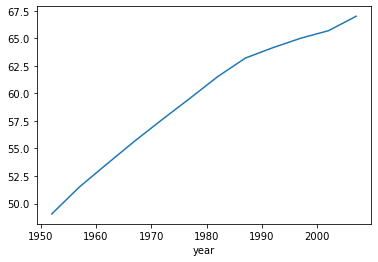

In [53]:
# year별로 lifeExp열의 평균을 그래프로 나타내기
df.groupby('year')['lifeExp'].mean().plot() 